# Generación conjunto de datos

In [20]:
import numpy as np

In [21]:
X = np.arange(1, 150)
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149])

In [22]:

y = 100 * X + np.random.uniform(-100, 10000, X.size)
y


array([ 2296.92557848,  8383.77113381,  6070.85659954,  2288.19203097,
        1746.82738962,  8757.05099179,  2738.73941555,  8009.77088224,
        6763.37833232,  1668.38752708,  4800.53040307,  6613.34077804,
       11184.26243001,  4820.0824468 ,  7584.471021  ,  6417.57548169,
        6556.61918425,  9709.91714574, 11201.57833449,  5889.90417627,
        4229.4835492 ,  3537.22913705, 10370.50541343,  3401.82509628,
        8903.83401191,  5431.02792667, 10427.95153324, 11829.36761022,
        4435.33616374, 12651.9303254 ,  5832.40087649,  5741.0922922 ,
        9045.87846211, 11756.45577153,  8339.68941374,  4843.53785312,
        9565.60852075,  3784.75987198,  7052.88194806,  6561.94285444,
        5582.42290081,  7890.18495975, 13930.96400187,  6171.75399616,
        9079.06781509,  6336.03324062, 12580.58952591,  8365.580303  ,
       12881.50118157, 11837.04770907,  7247.49658258, 11172.1072763 ,
       14375.19691953,  9800.02928108, 14697.55142976,  8448.50029796,
      

In [23]:
print("La longitud del conjunto de datos es:", len(X))

La longitud del conjunto de datos es: 149


# Visualización del conjunto de datos

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

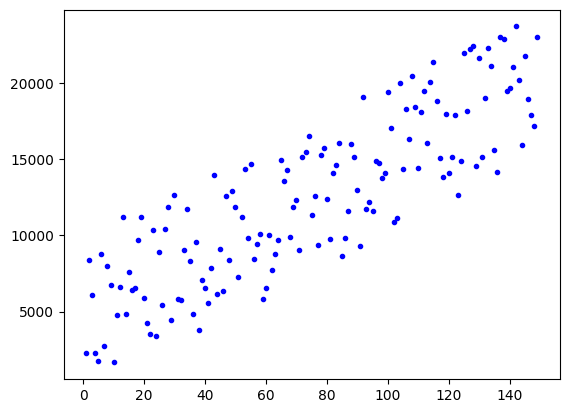

In [25]:
plt.plot(X, y, "b.")
plt.show()

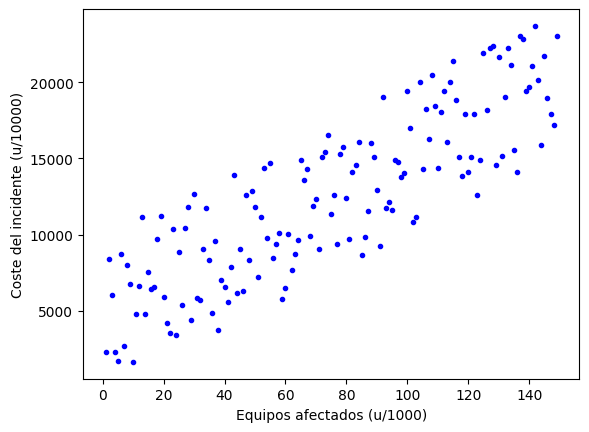

In [26]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

# Modificación del conjunto de datos

In [27]:
import pandas as pd

In [28]:
data = {'dia': X.flatten(), 'precio_registrado': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,dia,precio_registrado
0,1,2296.925578
1,2,8383.771134
2,3,6070.856600
3,4,2288.192031
4,5,1746.827390
5,6,8757.050992
6,7,2738.739416
7,8,8009.770882
8,9,6763.378332
9,10,1668.387527


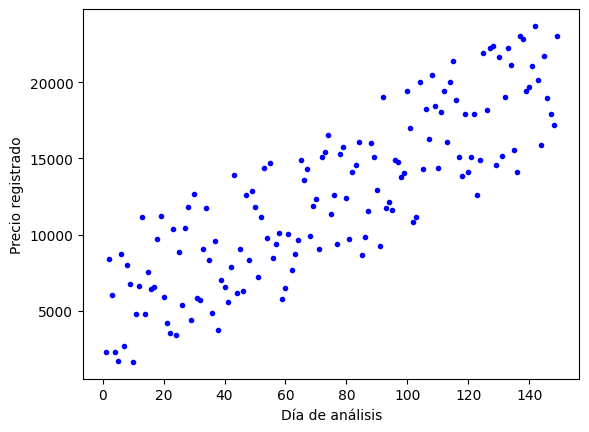

In [29]:
# Representación gráfica del conjunto de datos
plt.plot(df['dia'], df['precio_registrado'], "b.")
plt.xlabel("Día de análisis")
plt.ylabel("Precio registrado")
plt.show()

# Construcción de modelo

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(df['dia'].values.reshape(-1, 1), df['precio_registrado'].values)

LinearRegression()

In [32]:
lin_reg.intercept_

4460.08001623303

In [33]:
lin_reg.coef_

array([107.69323743])

In [34]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["dia"].min()], [df["dia"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

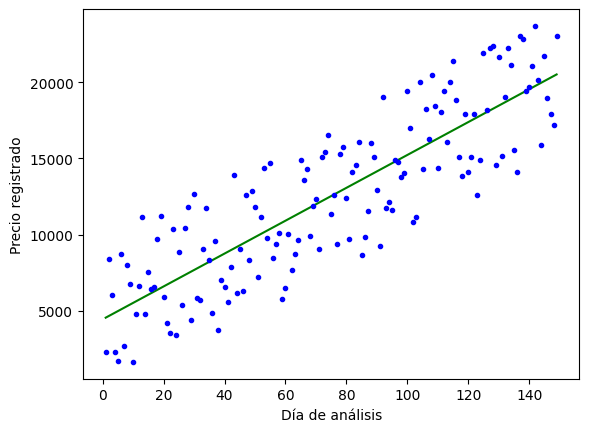

In [35]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['dia'], df['precio_registrado'], "b.")
plt.xlabel("Día de análisis")
plt.ylabel("Precio registrado")
plt.show()

# Predicción de nuevos ejemplos

In [36]:
x_new = np.array([[151]]) # Día n° 151

# Predicción del valor
coste = lin_reg.predict(x_new) 

print("El precio en dicho día sería:", int(coste[0]), "€")

El precio en dicho día sería: 20721 €


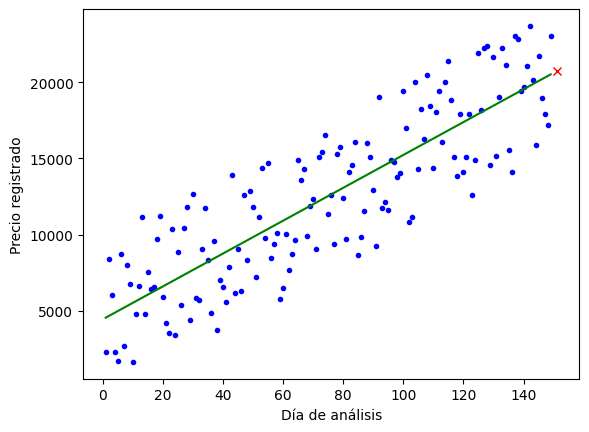

In [37]:
plt.plot(df['dia'], df['precio_registrado'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Día de análisis")
plt.ylabel("Precio registrado")
plt.show()